In [51]:
import copy
import PIL
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model import Company, StockLog, IndexLog, PerformanceLog
from model import start_engine
from datetime import date, datetime

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set()

In [52]:
engine = start_engine()

In [56]:
def get_corr(
    stocks = [],                # list of stocks 
    indicies = [],              # list of fundamental indicies
    sector = None,
    size = (8, 8),              # graph (length, height)
    start = '2009-07-01',       # start date in 'YYYY-MM-DD' format
    finish = None,              # finish date in 'YYYY-MM-DD' format
    title = None,               # graph title
    engine = engine):
    
    if (len(stocks) == 0) and (len(indicies) == 0) and not sector:
        raise Exception('Empty list')
    
    if not engine:
        engine = start_engine()

    (x, y) = size
    plt.figure(figsize=(x, y), dpi=100)
      
    start = datetime.strptime(start, '%Y-%m-%d').date()
    if finish:
        finish = datetime.strptime(finish, '%Y-%m-%d').date()
    else:
        finish = datetime.today()        
     
    table = pd.DataFrame()
    if sector:
        companies = Company().query().filter(Company.sector == sector).all()
    else:
        companies = [Company().query().get(stock) for stock in stocks]
    for company in companies:
        stock_log = StockLog().query().filter((StockLog.company == company) &
                                              (StockLog.date >= start) &
                                              (StockLog.date <= finish))
        df = pd.read_sql(stock_log.statement, engine)
        df.sort_values(by='date', inplace=True)
        df.set_index('date', inplace=True)
        df.rename(columns={'closing': company.code}, inplace=True)
        table = table.merge(df[company.code], how='outer', left_index=True, right_index=True)
    corr = table.corr()
    sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig('corr.png', format='png')
    plt.close()     
    img = PIL.Image.open('corr.png')
    return img

In [57]:
stocks = ['ABC', 'ALQ', 'CBA', 'WES']

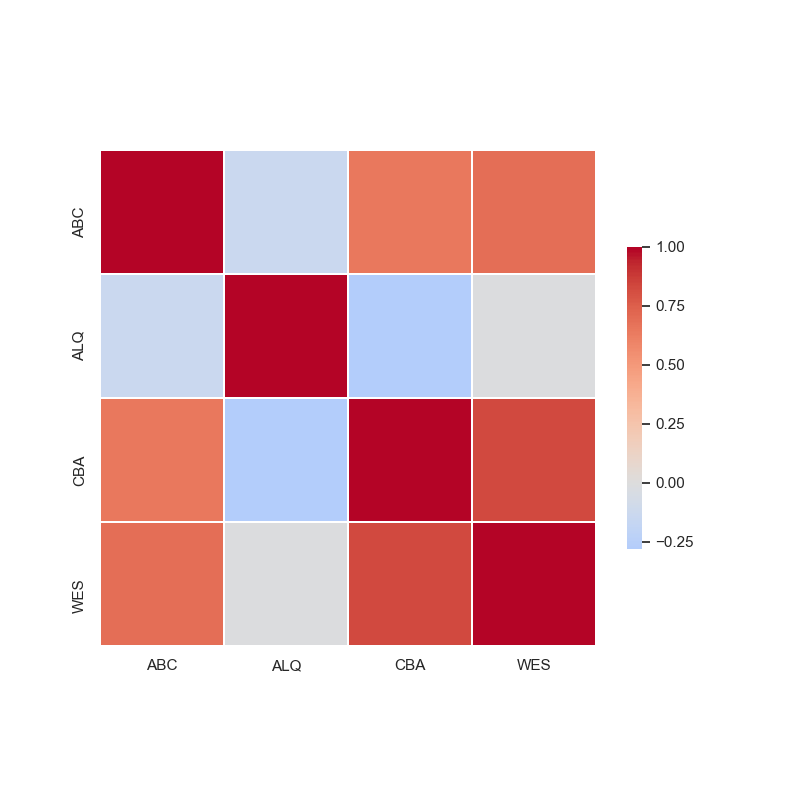

In [58]:
get_corr(stocks, start = '2009-07-01',  finish = '2019-07-01')

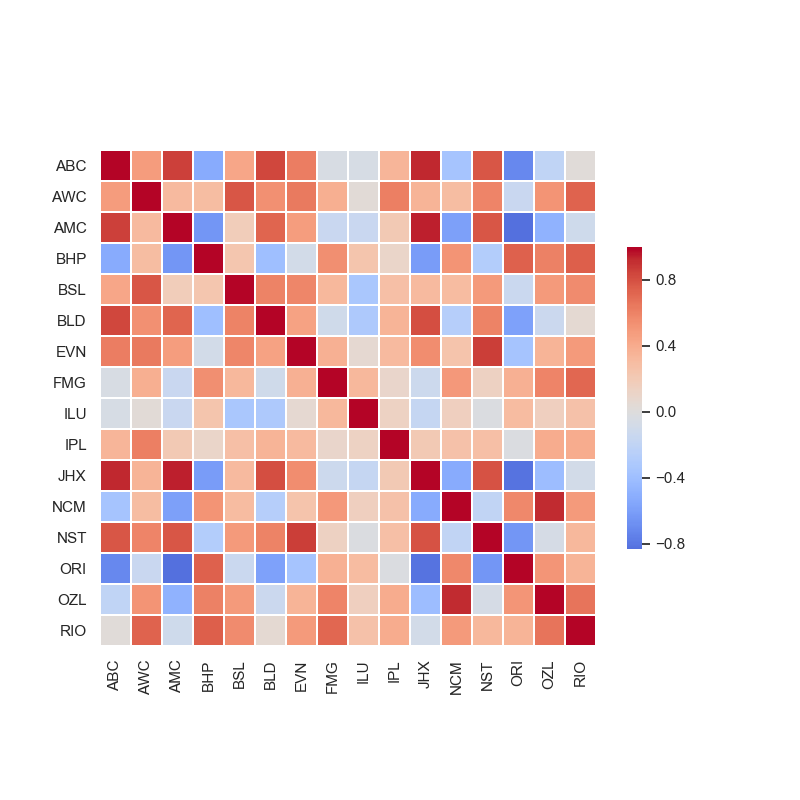

In [59]:
get_corr(sector='Materials', start = '2009-07-01',  finish = '2019-07-01')